In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.table import Table

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import chi2_contingency

from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

from imblearn.over_sampling import BorderlineSMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from scipy.stats import chi2_contingency

from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import ttest_ind

from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
from sklearn.exceptions import ConvergenceWarning
# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [2]:
df = pd.read_excel('Dataset.xlsx')

## Clean Data

In [3]:
# Get the list of columns to convert to categorical
categorical_columns = df.select_dtypes(include='int64').columns.tolist()

# Convert the selected columns to categorical
df[categorical_columns] = df[categorical_columns].astype('category')

numeric_data = df.select_dtypes(include=[np.number])

# Calculate MAD for each column
mad = numeric_data.mad()

# Choose a threshold multiplier
k = 3

# Calculate the threshold value
threshold = k * mad

# Identify outliers
outliers = (np.abs(numeric_data - numeric_data.median()) > threshold)

# Apply logarithm to the specified columns
outlier_columns = ['CommissionSacrificePercentage', 'BonusCommissionPercentage']
for column in outlier_columns:
    df[column] = np.log1p(df[column])

numeric_data = df.select_dtypes(include=[np.number])

# Check that all outliers have been handled
outliers = (np.abs(numeric_data - numeric_data.median()) > threshold)

# Count the number of outliers in each column
outlier_counts = outliers.sum()

# Create a new DataFrame from outlier_counts
outlier_table = pd.DataFrame({'Column': outlier_counts.index, 'Outlier Count': outlier_counts.values})

# Display the table
print(outlier_table)

                          Column  Outlier Count
0  CommissionSacrificePercentage              0
1      BonusCommissionPercentage              0


In [4]:
df = df.drop(columns=['PropDate'])

X = df.drop('PolicyIssued', axis=1)  # Features
y = df['PolicyIssued']  # Target variable

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create new DataFrames for training and testing data
df = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)


# Model Selection

Model: Logistic Regression
Accuracy: 0.78
Precision: 0.79
Recall: 0.97
F1 Score: 0.87
ROC AUC Score: 0.55
-------------------------
Model: Decision Tree
Accuracy: 0.76
Precision: 0.85
Recall: 0.85
F1 Score: 0.85
ROC AUC Score: 0.66
-------------------------
Model: Random Forest
Accuracy: 0.78
Precision: 0.84
Recall: 0.88
F1 Score: 0.86
ROC AUC Score: 0.65
-------------------------
Model: Gradient Boosting
Accuracy: 0.80
Precision: 0.82
Recall: 0.96
F1 Score: 0.88
ROC AUC Score: 0.60
-------------------------
Model: LightGBM
Accuracy: 0.81
Precision: 0.84
Recall: 0.93
F1 Score: 0.88
ROC AUC Score: 0.65
-------------------------


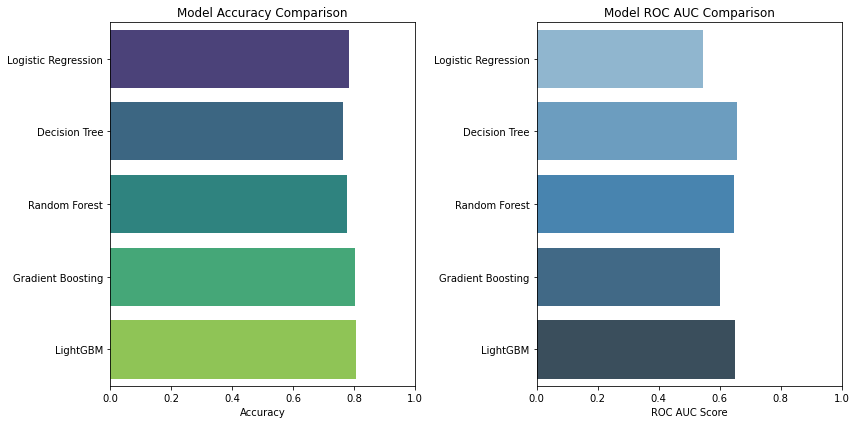

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import lightgbm as lgb

X = df.drop('PolicyIssued', axis=1)  # Features
y = df['PolicyIssued']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of models to iterate through
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "LightGBM": lgb.LGBMClassifier(),
}

# Create lists to store the model names, accuracies, and ROC AUC scores
model_names = []
accuracies = []
roc_auc_scores = []

# Loop through each model, fit it to the data, and evaluate its performance
for name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Append the results to the lists
    model_names.append(name)
    accuracies.append(accuracy)
    roc_auc_scores.append(roc_auc)
    
    # Print the results for each model
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC Score: {roc_auc:.2f}")
    print("-------------------------")

# Create subplots for model accuracy and ROC AUC visualisations
plt.figure(figsize=(12, 6))

# Model Accuracy Comparison
plt.subplot(1, 2, 1)
sns.barplot(x=accuracies, y=model_names, palette="viridis")
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1.0)  # Set the x-axis limits to accommodate accuracy values

# Model ROC AUC Comparison
plt.subplot(1, 2, 2)
sns.barplot(x=roc_auc_scores, y=model_names, palette="Blues_d")
plt.xlabel("ROC AUC Score")
plt.title("Model ROC AUC Comparison")
plt.xlim(0, 1.0)  # Set the x-axis limits to accommodate ROC AUC values

plt.tight_layout()  
plt.show()


# Hyperparameter Tuning

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model
param_grids = {
    "Logistic Regression": {
        "C": [0.001, 0.01, 0.1, 1, 10],
        "penalty": ["l1", "l2"]
    },
    "Decision Tree": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 4, 5],
        "learning_rate": [0.01, 0.1, 0.2]
    },
    "LightGBM": {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 4, 5],
        "learning_rate": [0.01, 0.1, 0.2]
    },
}

# Create lists to store the model names, accuracies, and ROC AUC scores
model_names = []
accuracies = []
roc_auc_scores = []

# Create dictionaries to store the best hyperparameters and best models
best_hyperparameters = {}
best_models = {}

# Loop through each model and perform hyperparameter tuning
for name, model in models.items():
    # Define the hyperparameter grid for the current model
    param_grid = param_grids.get(name, {})  # Get the hyperparameter grid or an empty dictionary
    
    # Create GridSearchCV object
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
    
    # Fit the model to the data with hyperparameter tuning
    grid_search.fit(X_train, y_train)
    
    # Get the best hyperparameters
    best_hyperparameters[name] = grid_search.best_params_
    
    # Get the best model with tuned hyperparameters
    best_model = grid_search.best_estimator_
    
    # Store the best model in the dictionary
    best_models[name] = best_model
    
    # Print the results for each set of hyperparameters
    print(f"Model: {name}")
    print("Hyperparameters and Cross-Validation Scores:")
    for params, score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
        print(f"Hyperparameters: {params}")
        print(f"Mean CV Score: {score:.2f}")
    
    # Evaluate the best model's performance
    y_pred = best_model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Append the results to the lists
    model_names.append(name)
    accuracies.append(accuracy)
    roc_auc_scores.append(roc_auc)
    
    # Print the results for the best model
    print(f"Best Hyperparameters: {best_hyperparameters[name]}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC Score: {roc_auc:.2f}")
    print("-------------------------")


C:\Users\gregl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gregl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gregl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gregl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

Model: Logistic Regression
Hyperparameters and Cross-Validation Scores:
Hyperparameters: {'C': 0.001, 'penalty': 'l1'}
Mean CV Score: nan
Hyperparameters: {'C': 0.001, 'penalty': 'l2'}
Mean CV Score: 0.79
Hyperparameters: {'C': 0.01, 'penalty': 'l1'}
Mean CV Score: nan
Hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Mean CV Score: 0.79
Hyperparameters: {'C': 0.1, 'penalty': 'l1'}
Mean CV Score: nan
Hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Mean CV Score: 0.78
Hyperparameters: {'C': 1, 'penalty': 'l1'}
Mean CV Score: nan
Hyperparameters: {'C': 1, 'penalty': 'l2'}
Mean CV Score: 0.79
Hyperparameters: {'C': 10, 'penalty': 'l1'}
Mean CV Score: nan
Hyperparameters: {'C': 10, 'penalty': 'l2'}
Mean CV Score: 0.79
Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Accuracy: 0.78
Precision: 0.79
Recall: 0.98
F1 Score: 0.88
ROC AUC Score: 0.54
-------------------------
Model: Decision Tree
Hyperparameters and Cross-Validation Scores:
Hyperparameters: {'max_depth': None, 'min_samples_split': 2}
Me

In [ ]:
# Create subplots for model accuracy and ROC AUC visualizations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=accuracies, y=model_names, palette="viridis")
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1.0)

plt.subplot(1, 2, 2)
sns.barplot(x=roc_auc_scores, y=model_names, palette="Blues_d")
plt.xlabel("ROC AUC Score")
plt.title("Model ROC AUC Comparison")
plt.xlim(0, 1.0)

plt.tight_layout()
plt.show()


In [ ]:
# Print and visualise the best models
for name, best_model in best_models.items():
    print(f"Best Model: {name}")
    print("Best Hyperparameters:", best_hyperparameters[name])
    
    # Evaluate the best model's performance
    y_pred = best_model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Print the results for the best model
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC Score: {roc_auc:.2f}")
    print("-------------------------")
    

## Using Most Important Features Only

### Logistic Regression

In [ ]:
# Select predictor variables
X = df[['Agency', 'WorkflowStatus', 'UWDecision','CommDateProvided','SignedDecReceived']]
y = df['PolicyIssued']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid for logistic regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Create a Logistic Regression model
logistic_regression_model = LogisticRegression()

# Create GridSearchCV object for logistic regression
grid_search = GridSearchCV(logistic_regression_model, param_grid, cv=5, scoring='roc_auc')

# Fit the logistic regression model to the data with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_hyperparameters = grid_search.best_params_

# Get the best logistic regression model with tuned hyperparameters
best_logistic_regression_model = grid_search.best_estimator_

# Evaluate the best logistic regression model's performance
y_pred = best_logistic_regression_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the results for the best logistic regression model
print("Best Hyperparameters:", best_hyperparameters)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Create subplots for model accuracy and ROC AUC visualisations (same code as before)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=[accuracy], y=["Logistic Regression"], palette="viridis")
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1.0)

plt.subplot(1, 2, 2)
sns.barplot(x=[roc_auc], y=["Logistic Regression"], palette="Blues_d")
plt.xlabel("ROC AUC Score")
plt.title("Model ROC AUC Comparison")
plt.xlim(0, 1.0)

plt.tight_layout()
plt.show()


### Decision Tree & Random Forest

#### 'Agency', 'WorkflowStatus'

In [ ]:
# Select predictor variables
X = df[['Agency', 'WorkflowStatus']]
y = df['PolicyIssued']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grids for Decision Tree and Random Forest
param_grids = {
    "Decision Tree": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
}

# Create lists to store the model names, accuracies, and ROC AUC scores
model_names = []
accuracies = []
roc_auc_scores = []

# Create dictionaries to store the best hyperparameters and best models
best_hyperparameters = {}
best_models = {}

# Loop through Decision Tree and Random Forest models and perform hyperparameter tuning
for name, param_grid in param_grids.items():
    if name in ["Decision Tree", "Random Forest"]:
        if name == "Decision Tree":
            model = DecisionTreeClassifier()
        elif name == "Random Forest":
            model = RandomForestClassifier()

        # Create GridSearchCV object
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')

        # Fit the model to the data with hyperparameter tuning
        grid_search.fit(X_train, y_train)

        # Get the best hyperparameters
        best_hyperparameters[name] = grid_search.best_params_

        # Get the best model with tuned hyperparameters
        best_model = grid_search.best_estimator_

        # Store the best model in the dictionary
        best_models[name] = best_model

        # Print the results for each set of hyperparameters
        print(f"Model: {name}")
        print("Hyperparameters and Cross-Validation Scores:")
        for params, score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
            print(f"Hyperparameters: {params}")
            print(f"Mean CV Score: {score:.2f}")

        # Evaluate the best model's performance
        y_pred = best_model.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)

        # Append the results to the lists
        model_names.append(name)
        accuracies.append(accuracy)
        roc_auc_scores.append(roc_auc)

        # Print the results for the best model
        print(f"Best Hyperparameters: {best_hyperparameters[name]}")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1 Score: {f1:.2f}")
        print(f"ROC AUC Score: {roc_auc:.2f}")
        print("-------------------------")

# Create subplots for model accuracy and ROC AUC visualisations (same code as before)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=accuracies, y=model_names, palette="viridis")
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1.0)

plt.subplot(1, 2, 2)
sns.barplot(x=roc_auc_scores, y=model_names, palette="Blues_d")
plt.xlabel("ROC AUC Score")
plt.title("Model ROC AUC Comparison")
plt.xlim(0, 1.0)

plt.tight_layout()
plt.show()

# Print and visualize the best models
for name, best_model in best_models.items():
    print(f"Best Model: {name}")
    print("Best Hyperparameters:", best_hyperparameters[name])

    # Evaluate the best model's performance
    y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Print the results for the best model
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC Score: {roc_auc:.2f}")
    print("-------------------------")


#### 'Agency', 'WorkflowStatus', 'CommDateProvided', 'UWDecision'

Model: Decision Tree
Hyperparameters and Cross-Validation Scores:
Hyperparameters: {'max_depth': None, 'min_samples_split': 2}
Mean CV Score: 0.79
Hyperparameters: {'max_depth': None, 'min_samples_split': 5}
Mean CV Score: 0.79
Hyperparameters: {'max_depth': None, 'min_samples_split': 10}
Mean CV Score: 0.79
Hyperparameters: {'max_depth': 10, 'min_samples_split': 2}
Mean CV Score: 0.80
Hyperparameters: {'max_depth': 10, 'min_samples_split': 5}
Mean CV Score: 0.80
Hyperparameters: {'max_depth': 10, 'min_samples_split': 10}
Mean CV Score: 0.80
Hyperparameters: {'max_depth': 20, 'min_samples_split': 2}
Mean CV Score: 0.79
Hyperparameters: {'max_depth': 20, 'min_samples_split': 5}
Mean CV Score: 0.79
Hyperparameters: {'max_depth': 20, 'min_samples_split': 10}
Mean CV Score: 0.80
Hyperparameters: {'max_depth': 30, 'min_samples_split': 2}
Mean CV Score: 0.79
Hyperparameters: {'max_depth': 30, 'min_samples_split': 5}
Mean CV Score: 0.79
Hyperparameters: {'max_depth': 30, 'min_samples_split': 

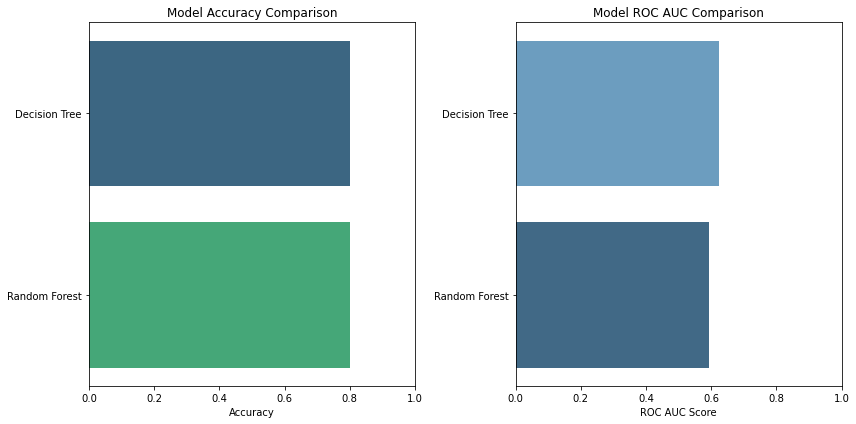

Best Model: Decision Tree
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10}
Accuracy: 0.80
Precision: 0.83
Recall: 0.94
F1 Score: 0.88
ROC AUC Score: 0.62
-------------------------
Best Model: Random Forest
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.80
Precision: 0.81
Recall: 0.96
F1 Score: 0.88
ROC AUC Score: 0.59
-------------------------


In [9]:
# Select predictor variables
X = df[['Agency', 'WorkflowStatus', 'CommDateProvided', 'UWDecision']]
y = df['PolicyIssued']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grids for Decision Tree and Random Forest
param_grids = {
    "Decision Tree": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
}

# Create lists to store the model names, accuracies, and ROC AUC scores
model_names = []
accuracies = []
roc_auc_scores = []

# Create dictionaries to store the best hyperparameters and best models
best_hyperparameters = {}
best_models = {}

# Loop through Decision Tree and Random Forest models and perform hyperparameter tuning
for name, param_grid in param_grids.items():
    if name in ["Decision Tree", "Random Forest"]:
        if name == "Decision Tree":
            model = DecisionTreeClassifier()
        elif name == "Random Forest":
            model = RandomForestClassifier()

        # Create GridSearchCV object
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')

        # Fit the model to the data with hyperparameter tuning
        grid_search.fit(X_train, y_train)

        # Get the best hyperparameters
        best_hyperparameters[name] = grid_search.best_params_

        # Get the best model with tuned hyperparameters
        best_model = grid_search.best_estimator_

        # Store the best model in the dictionary
        best_models[name] = best_model

        # Print the results for each set of hyperparameters
        print(f"Model: {name}")
        print("Hyperparameters and Cross-Validation Scores:")
        for params, score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
            print(f"Hyperparameters: {params}")
            print(f"Mean CV Score: {score:.2f}")

        # Evaluate the best model's performance
        y_pred = best_model.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)

        # Append the results to the lists
        model_names.append(name)
        accuracies.append(accuracy)
        roc_auc_scores.append(roc_auc)

        # Print the results for the best model
        print(f"Best Hyperparameters: {best_hyperparameters[name]}")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1 Score: {f1:.2f}")
        print(f"ROC AUC Score: {roc_auc:.2f}")
        print("-------------------------")

# Create subplots for model accuracy and ROC AUC visualisations (same code as before)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=accuracies, y=model_names, palette="viridis")
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1.0)

plt.subplot(1, 2, 2)
sns.barplot(x=roc_auc_scores, y=model_names, palette="Blues_d")
plt.xlabel("ROC AUC Score")
plt.title("Model ROC AUC Comparison")
plt.xlim(0, 1.0)

plt.tight_layout()
plt.show()

# Print and visualize the best models
for name, best_model in best_models.items():
    print(f"Best Model: {name}")
    print("Best Hyperparameters:", best_hyperparameters[name])

    # Evaluate the best model's performance
    y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Print the results for the best model
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC Score: {roc_auc:.2f}")
    print("-------------------------")
